In [1]:
from super_ivim_dc.source.Classsic_ivim_fit import *
from random import uniform
import numpy as np
import matplotlib.pyplot as plt
import sys

# Parameter bounds: [D, D*, f, S0]
bounds = [
    [0.0003, 0.009, 0.3, 50],
    [0.01,   0.04,  0.5, 300],
]

# b-values for IVIM model
b_vector = np.array([0, 25, 50, 75, 100, 200, 400, 800])


def generate_si(b_vector=b_vector):
    """
    Generate one synthetic IVIM signal.

    Samples (D, DStar, f, s0) uniformly within `bounds`,
    computes the IVIM_model at each b, and returns:
      - si: 1D np.array of signal values
      - p0: list of the true parameters [D, DStar, f, s0]
    """
    D      = uniform(bounds[0][0], bounds[1][0])
    DStar  = uniform(bounds[0][1], bounds[1][1])
    f      = uniform(bounds[0][2], bounds[1][2])
    s0     = uniform(bounds[0][3], bounds[1][3])
    p0     = [D, DStar, f, s0]
    si     = IVIM_model(b_vector=b_vector, D=D, DStar=DStar, f=f, s0=s0)
    return np.asarray(si), p0

In [2]:
si_array = np.asarray([generate_si()[0] for _ in range(2)])
idx = 0

fit_sls    = IVIM_fit_sls(si_array.T, b_vector, bounds)
est_sls    = IVIM_model(b_vector,
                            fit_sls[0][idx],
                            fit_sls[1][idx],
                            fit_sls[2][idx],
                            fit_sls[3][idx])

fit_lm     = IVIM_fit_sls_lm(si_array.T, b_vector, bounds)
est_lm     = IVIM_model(b_vector,
                            fit_lm[0][idx],
                            fit_lm[1][idx],
                            fit_lm[2][idx],
                            fit_lm[3][idx])

fit_trf    = IVIM_fit_sls_trf(si_array.T, b_vector, bounds)
est_trf    = IVIM_model(b_vector,
                            fit_trf[0][idx],
                            fit_trf[1][idx],
                            fit_trf[2][idx],
                            fit_trf[3][idx])




In [3]:
fit_sls_bobyqa = IVIM_fit_sls_BOBYQA(si_array.T, b_vector, bounds)
est_bobyqa = IVIM_model (b_vector, 
                         fit_sls_bobyqa[0][idx], 
                         fit_sls_bobyqa[1][idx], 
                         fit_sls_bobyqa[2][idx], 
                         fit_sls_bobyqa[3][idx])

Text(0.5, 1.0, 'IVIM fit comparison')

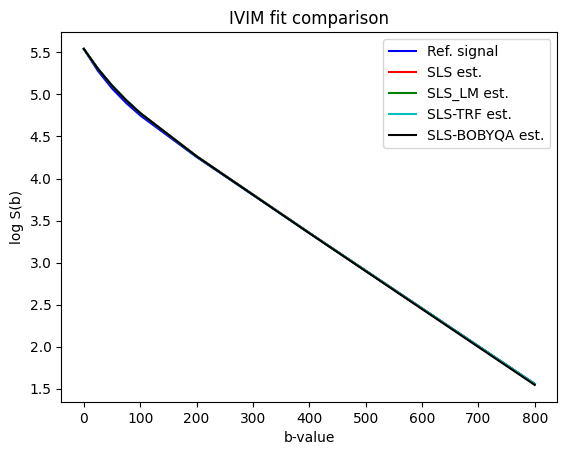

In [4]:

# Original vs fitted signals (log‐domain)
plt.figure()
plt.plot(b_vector, np.log(si_array[idx]),       'b-', label='Ref. signal')
plt.plot(b_vector, np.log(est_sls),             'r-', label='SLS est.')
plt.plot(b_vector, np.log(est_lm),              'g-', label='SLS_LM est.')
plt.plot(b_vector, np.log(est_trf),             'c-', label='SLS-TRF est.')
plt.plot(b_vector, np.log(est_bobyqa),          'k-', label='SLS-BOBYQA est.')
plt.xlabel('b-value')
plt.ylabel('log S(b)')
plt.legend()
plt.title('IVIM fit comparison')